In [1]:
from typing import NamedTuple, List
from cs103 import *

# Module 6 Notes

We're trying Jupyter notebook slideshows for today!

## Goals for the Day, be able to:
+ explain the relationship among the helper rules:
  reference, knowledge domain shift, composition,
  and "one task per function"
+ identify when the new helper rules apply
+ implement a function templated by composition using a composition plan
+ plan, call, and design helper functions (as in Module 5!)

## Pre-Lecture Assignment

The quiz went well, but there were lots of questions this
week. Most we'll address as we work through lecture. Let's call out a handful:

**Q:** What is the difference between a task that requires two separate functions and a task that requires one function and a helper function? 

There's not really any difference. A helper function is just a function! We call it a "helper" because it *helps* us in designing a function. (You might not even design a *new* function to be your "helper". You could use one you designed previously or a built-in one like `abs`.) We'll talk more about this throughout next week!

Helper functions are just like any other function so you still need to follow the HtDF recipe when designing helpers.

**Q:** Does this imply that we can code for more complex problems with only one function, but helper functions just help make our code simpler and more readable?

Yes. Breaking a design into small pieces (helper functions!) helps us make complex designs and simplify our code.

Is this how real code works? [Yes!](https://stackoverflow.com/questions/611304/how-many-lines-of-code-should-a-function-procedure-method-have).

For 103: **If in doubt, design a helper!** We *will* deduct marks for missing helper functions required by our rules. We will not penalize for "unnecessary" but correct helpers that follow the recipe.

## Detailed Intro (for notes only)
As programs get larger, it's critical our design process breaks
problems down into manageable pieces that "stand alone".

That is the central idea of how we decide when we need a new function:
each function should have *one* task that it does. It should hand off
to other functions any additional tasks.

We'll run into this in a few overlapping ways. Let's talk about the
rules that suggest we need a helper function and draw a picture of how
they relate:
+ The *knowledge domain shift* rule suggests a helper function when
  our function needs to work with different kinds of data than the
  kind it was given as parameters.
  
  + The *reference rule* identifies specific cases of knowledge domain 
    shift where we can *see* the shift in the data definition because
    it refers to a different data definition.
    
    When to "invoke" the knowledge domain shift rule in general
    requires substantial judgment, while the reference rule
    specifically doesn't require much judgment.
    
+ The *composition* rule suggests splitting tasks into different
  helpers when those tasks are really separate and can/should happen
  one after another. The body of a function design with composition
  might look like this:
  ```python
    # Plan:
    # 1) get a list of the deadlines from loa (a List[Assignment])
    # 2) find the earliest deadline
    # 3) return the number of days until that deadline

    return days_until(find_earliest(get_deadlines(loa)))
  ```

  You might get confused about which function call goes inside which
  parentheses. If so, write it like this instead:
  ```python
    # Plan:
    # 1) get a list of the deadlines from loa (a List[Assignment])
    # 2) find the earliest deadline
    # 3) return the number of days until that deadline

    deadlines = get_deadlines(loa)               # Step 1
    earliest_deadline = find_earliest(deadlines) # Step 2
    return days_until(earliest_deadline)         # Step 3
  ```
  
+ Any other time you feel a function has some separate, stand-alone
  sub-task to do as part of its work, that's the overarching *one task
  per function* rule. Definitely try to break down long or complex
  functions using this rule, even if no other rule explicitly applies!

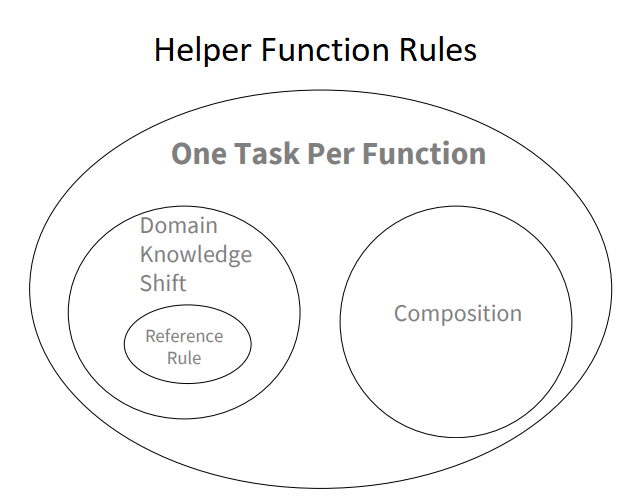

As you design helper functions, remember the following:
1. As you're designing a function, when you realize you need a helper:
   write the helper's signature, purpose, stub, and enough tests that at
   least one will fail (so you don't forget to go back and finish),
   and then *assume it works*. You get to call it in the function you
   were designing and just magically figure it's correct.
   
   Of course, later on, you have to make good on that magic by
   completing the helper function's design!
   
2. *You can use a helper function just like any other function.* Just
   like you can call the `image_height` function anywhere you like to
   find the height of an image, you can call any helper function you
   design wherever you need it to accomplish its purpose!
   
3. *Designing a helper function is just like designing any other
   function* except *you* decide what the function does.
   
   So, write down in as clear English as you can what the function
   needs to do. Then, follow the usual How to Design Function steps!
   
   This should make it *easier* to solve the original function. The
   problem of thinking about some complex sub-task and implementing
   everything all at once has been divided into: designing a solution
   for that complex sub-task separately and then using that solution
   to solve the original problem.
   
   Bottom line: *a helper function is just a regular function*! We
   call them "helpers" simply because they help us in the design of
   another function!
   
4. If in doubt, err on the side of writing a helper function! 😁

## Intro
As programs get larger, our design process's **helper rules break
programs down into manageable pieces**.

Every helper rule is about the overarching idea that **each function should have *one* task that it does**. It should hand off
to other functions any additional tasks.

Let's talk this through using a picture of our rules and their relationship:

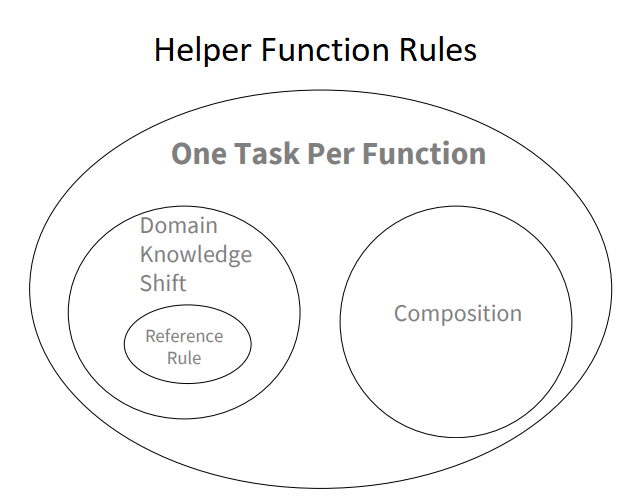

The body of a function design with composition might look like:
```python
# Plan:
# 1) get a list of deadlines from loa (a List[Assignment])
# 2) find the earliest deadline
# 3) return the number of days until that deadline

return days_until(find_earliest(get_deadlines(loa)))
```

If writing it all one one line is confusing, use variables to break it up:
```python
# Plan:
# 1) get a list of deadlines from loa (a List[Assignment])
# 2) find the earliest deadline
# 3) return the number of days until that deadline

deadlines = get_deadlines(loa)               # Step 1
earliest_deadline = find_earliest(deadlines) # Step 2
return days_until(earliest_deadline)         # Step 3
```

**Helper rule rule of thumb:** If in doubt, err on the side of writing a helper function! 😁

### Helper Design Tips
When you realize you need a helper:
+ write its signature, purpose, stub and a decent initial set of tests 
+ write a "TODO" item to come back to it
+ then **assume it magically works** and use it in your original design problem
Of course, *later on*, you have to go back and complete the design!   

Use a helper function just like any other function.

Just like you call `image_height` anywhere you want the height of an image, call your helper function wherever you need it to accomplish its purpose!
   

Designing a helper function is just like designing any other function except *you* decide what the function does.

Write down in clear English what the function needs to do. Then, follow HtDF!

## School Tuition

Given a list of schools across the world, a location of residence (the
place where you live), and an alternate
location you're considering, find the school with the lowest tuition
in one of the two locations under consideration. 

Assume that the list of schools you are being given is not going to be an empty list and that the list contains at least one school from the residence you are interested in.

Let's exit slide mode and work on this...

In [2]:
School = NamedTuple('School', [('name', str),
                               ('location', str),
                               ('local_tuition', int),       # in range[0,...]
                               ('non_local_tuition', int)])  # in range[0,...]
# interp. Schools with their name, location (as a string, which may be a province or
# other location), local tuition, and non-local tuition.
S1 = School('School_1', 'Canada', 100, 1000)
S2 = School('School_2', 'Canada', 50, 800)
S3 = School('School_3', 'USA', 400, 5000)
S4 = School('School_4', 'Australia', 30, 300)

# template based on compound (4 fields)
@typecheck
def fn_for_school(s: School) -> ...:
    return ...(s.name,
               s.location,
               s.local_tuition,
               s.non_local_tuition)



# List[School]
# interp. a list of schools

L1 = []
L2 = [S1, S2]
L3 = [S1, S2, S3, S4]

# template based on arbitrary-sized with the reference rule
@typecheck
def fn_for_los(los: List[School]) -> ...:
    # description of acc
    acc = ... # type: ...
    
    for s in los:
        acc = ...(fn_for_school(s), acc)
        
    return ...(acc)

In [3]:
# We've already got a signature, purpose, stub, and examples.
# Let's start by writing out a plan of what we want to do in English.
# (If the plan has multiple, separate steps, then we will NOT template based
# on List[School] but rather based on function composition!)

@typecheck
def find_lowest_tuition_in_areas(los: List[School], residence: str, alternate: str) -> School:
    """
    Given los (which must contain at least one school located in either residence or alternate),
    produce the school located in either residence or alternate that has the lowest tuition,
    given that we reside in the location residence (which affects local vs. non-local tuition
    for schools).
    """
    return S1  # stub


start_testing()

# reviewing these tests will help you write other tests
# Do we need any other tests? Well, look at the value of the
# parameter named alternate in each test case below.
expect(find_lowest_tuition_in_areas(L2, "Canada", "Australia"), S2)
expect(find_lowest_tuition_in_areas(L3, "Canada", "Australia"), S2)
expect(find_lowest_tuition_in_areas(L3, "USA", "Australia"), S4)

summary()

Test failed: expected School(name='School_2', location='Canada', local_tuition=50, non_local_tuition=800) but got School(name='School_1', location='Canada', local_tuition=100, non_local_tuition=1000)
    Line 22: expect(find_lowest_tuition_in_areas(L2, "Canada", "Australia"), S2)
Test failed: expected School(name='School_2', location='Canada', local_tuition=50, non_local_tuition=800) but got School(name='School_1', location='Canada', local_tuition=100, non_local_tuition=1000)
    Line 23: expect(find_lowest_tuition_in_areas(L3, "Canada", "Australia"), S2)
Test failed: expected School(name='School_4', location='Australia', local_tuition=30, non_local_tuition=300) but got School(name='School_1', location='Canada', local_tuition=100, non_local_tuition=1000)
    Line 24: expect(find_lowest_tuition_in_areas(L3, "USA", "Australia"), S4)
0 of 3 tests passed


## Worksheet Q2

Suppose you are analyzing survey responses and want to design a function called
`keep_valid_responses` that takes a list of strings; and returns a list of the strings
that both (a) are at least fifteen characters long and (b) start with the string
`"response:"`. You also want to strip the prefix `"response:"` out of each of the strings in
the list that you’ll return.
So if this input is the list:

```python
['response:', 'response:I like it', 'I like it', 'response: x', 'response: I don’t like it']
```
the list below is returned
```python
['I like it', ' I don’t like it']
```

In [4]:
# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ['hello', 'starfish', 'it', 'a', 'apple', 'sit', 'Santa']

# Template based on arbitrary-sized data
@typecheck
def fn_for_los(los: List[str]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for s in los:
        acc = ...(s, acc)
    return ...(acc)

In [5]:
@typecheck
def starts_with(s: str, initial_string: str) -> bool:
    """
    produce True if s starts with initial_string
    """
    #return True  #stub
    # return ...(s, initial_string)   #template
    
    return s[:len(initial_string)] == initial_string

start_testing()
expect(starts_with('', 'response:'), False)
expect(starts_with('', ''), True)
expect(starts_with('response:', 'response:'), True)
expect(starts_with('response:xyz', 'response:'), True)
expect(starts_with('response I like it', 'response:'), False)
expect(starts_with('response I like it', 'res'), True)
expect(starts_with('response I like it', ' res'), False)
summary()

7 of 7 tests passed


In [6]:
@typecheck
def keep_valid_responses(los: List[str]) -> List[str]:
    """
    Filters the list to remove responses that don't start with "response:" or 
    are less than 15 characters, then  removes the text "response:" from the beginning 
    of each of the remaining strings and returns that list
    """
    return []  #stub


start_testing()

# examples and tests for keep_valid_responses
expect(keep_valid_responses([]), [])
expect(keep_valid_responses(['response:', 'response:I like it', 'I like it','response: x', 'response:I don’t like it']), ['I like it', 'I don’t like it'])

summary()

Test failed: expected ['I like it', 'I don’t like it'] but got []
    Line 15: expect(keep_valid_responses(['response:', 'response:I like it', 'I like it','response: x', 'response:I don’t like it']), ['I like it', 'I don’t like it'])
1 of 2 tests passed


## Quarterly Stock Volumes

**Problem:** Find the average volume traded of a stock in a given quarter (Jan-Mar, Apr-Jun, Jul-Sep, Oct-Dec).

There's code below already, and it's correct, but it's collection of three accumulators is a bit messy. Refactor it to use composition so it's clearer!

Note that `len` is a function that works on lists of any type as well as strings.

**We will not discuss this in class. Be sure to check out the sample solution when it releases!**

In [7]:
from typing import List

QuarterlyVolumes = List[int] # in range [0, ...]
# interp. the quarterly volumes traded of a stock (i.e., amounts for
# quarter 1 (Jan-Mar), 2 (Apr-Jun), 3 (Jul-Sep), or 4 (Oct-Dec).
# Examples should be in contiguous time order. In other words, they
# should not skip quarters!
LOQV0 = []
LOQV_ONE_YEAR = [0, 100, 25, 1]
LOQV_THREE_YEARS = [0, 100, 25, 1, 
                    10, 50, 14, 3, 
                    80, 22, 17, 100]
LOQV_AAPL_1981_2017 = [
    407831200, 519478400, 489932800, 631993600,
    668074400, 949284000, 1309442400, 2414451200,
    2595163200, 2057680800, 3525244800, 2950164000,
    2359016800, 2926879200, 2611828800, 2597033600,
    3928848000, 3329636800, 1554384800, 2560448800,
    3494248800, 3370024000, 3228338400, 3238194400,
    5211102400, 3537413600, 2316260800, 3878050400,
    3618042400, 2367792000, 1975013600, 2362396400,
    4022944800, 3290271600, 2265446400, 3147793600,
    2696965600, 2927540000, 2374775200, 3101204400,
    4448421600, 4826889200, 2587303600, 2474298400,
    2555954800, 2871699600, 2358750800, 2498073200,
    3463768000, 3697338400, 3623524800, 3328600800,
    4218620000, 3018895600, 3163902000, 3887556400,
    5114648000, 4395230000, 4575995200, 4480761600,
    4574766000, 2786229600, 2801103200, 3136456400,
    4537288000, 2168684000, 7016038400, 4268829600,
    7047930400, 4698766800, 8057212800, 8994638800,
    8298978800, 7929124000, 9919663600, 8127910000,
    7143329200, 6643840000, 6474946800, 9813283200,
    7883072400, 6566422800, 4828996200, 4385957800,
    5417846000, 5276752600, 4640484800, 3918398400,
    3547135200, 6175055600, 3718330000, 4367042400,
    6118987000, 5615421000, 6345362800, 12370646400,
    15458277800, 10890252100, 7960705900, 11291009800,
    15957925200, 13416171300, 13272236600, 11278408400,
    14212695000, 13526087400, 17327648800, 16682565200,
    20741779100, 15212747900, 14225769600, 21315004900,
    11849447400, 8488599000, 7274145200, 8201230100,
    9524811800, 11775259300, 9277186100, 7178974600,
    7860986000, 6357435000, 9693498500, 7102915400,
    8453186700, 8640290400, 6596215500, 9301358500,
    7911083600, 6857389000, 5806848600, 5030071200,
    4912005000, 4249617100, 3498583000, 3254283000,
    3579821100, 2828800200, 4050072500, 2784493400,
    2827936300, 2551770000, 2283923700, 2016991500,
    1699719000, 1711464000, 1763455000, 1635788200
]

@typecheck
# template based on arbitrary-sized
def fn_for_loqv(loqv: List[int]) -> ...:
    # description of the accumulator
    acc = ...   # type: ...

    for qv in loqv:
        acc = ...(qv, acc)

    return ...(acc)

In [8]:
@typecheck
def avg_volume_of_quarter(loqv: QuarterlyVolumes, quarter: int) -> float:
    """
    Return the average volume for the given stock in the given quarter across all years of data supplied.
    
    Assumes that loqv begins with quarter 1. quarter must be in the range [1,4].
    
    Returns 0 if there are no matching quarters.
    """
    #return 0.0  #stub
    #template based on QuarterlyVolumes
    
    # total is the total volume across quarters matching quarter seen so far
    total = 0   # type: int
    
    # count is the number of quarters matching quarter seen so far
    count = 0   # type: int
    
    # curr is the current quarter for the quarter currently under review
    curr = 1    # type: int  # in range[1,4]
    
    for qv in loqv:
        if quarter == curr:
            total += qv
            count += 1
        curr += 1
        if curr > 4:
            curr = 1
    
    if count == 0:
        return 0.0
    else:
        return total / count


start_testing()

# An extra example that has an incomplete year:
LOQV_INCOMPLETE_YEAR = [0, 100, 25, 1, 
                        10, 50, 14, 3, 
                        80, 22]

expect(avg_volume_of_quarter([], 1), 0.0)
expect(avg_volume_of_quarter([], 3), 0.0)
expect(avg_volume_of_quarter([10, 20, 300, 4000], 1), 10.0)
expect(avg_volume_of_quarter([10, 20, 300, 4000], 2), 20.0)
expect(avg_volume_of_quarter([10, 20, 300, 4000], 3), 300.0)
expect(avg_volume_of_quarter([10, 20, 300, 4000], 4), 4000.0)

expect(avg_volume_of_quarter(LOQV_THREE_YEARS, 1), (0+10+80)/3)
expect(avg_volume_of_quarter(LOQV_THREE_YEARS, 3), (25+14+17)/3)

expect(avg_volume_of_quarter(LOQV_INCOMPLETE_YEAR, 1), (0+10+80)/3)
expect(avg_volume_of_quarter(LOQV_INCOMPLETE_YEAR, 3), (25+14)/2)

summary()

10 of 10 tests passed
